# Directed scale-free networks

## Dependencies

In [1]:
%load_ext autoreload
%autoreload 2

from netin.models import DHModel, DPAModel, DPAHModel
from netin import viz
from netin.stats import get_node_metadata_as_dataframe

## Network parameters

In [2]:
N = 1000
f_m = 0.1
d = 0.01
h_M = 0.9
h_m = 0.9
plo_M = 2.0
plo_m = 2.0
seed = 1234

## Generation

In [3]:
# DPA: Preferential attachment only
m_dpa = DPAModel(N=N, f_m=f_m, d=d, plo_M=plo_M, plo_m=plo_m, seed=seed)
m_dpa.simulate()

In [4]:
# DH: Homophily only
m_dh = DHModel(N=N, f_m=f_m, d=d, h_m=h_m, h_M=h_M, plo_M=plo_M, plo_m=plo_m, seed=seed)
m_dh.simulate()

In [5]:
# DPAH: Preferential attachment and homophily
m_dpah = DPAHModel(N=N, f_m=f_m, d=d, h_m=h_m, h_M=h_M, plo_M=plo_M, plo_m=plo_m, seed=seed)
m_dpah.simulate()

## Plots

In [6]:
viz.reset_style()
viz.set_paper_style()

### Graph

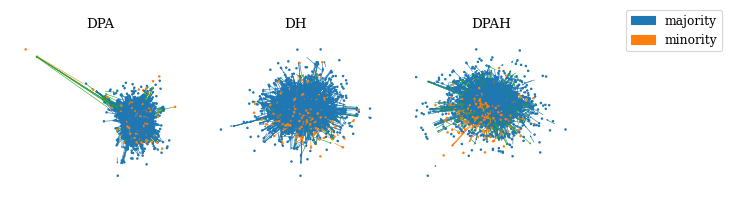

In [7]:
models = [m_dpa, m_dh, m_dpah]
viz.plot_graph(models, 
               cell_size=2, 
               edge_width=0.4,
               ignore_singletons=True, 
               share_pos=False)

### Node attributes

In [8]:
distributions = []
for m in models:
    md = get_node_metadata_as_dataframe(graph=m.graph, n_jobs=10)
    md.name = m.SHORT
    distributions.append(md)
    del(md)

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/8 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/8 [00:00<?, ?it/s]

In [9]:
# see example of generate metadata 
distributions[0].head()

,node,class_label,real_label,degree,in_degree,out_degree,clustering,betweenness,closeness,eigenvector,pagerank,degree_rank,in_degree_rank,out_degree_rank,clustering_rank,betweenness_rank,closeness_rank,eigenvector_rank,pagerank_rank
0,0,0,M,NaN,21,4,0.246667,0.003269,0.319300,0.049825,0.003384,NaN,0.60,0.935484,0.722892,0.122762,0.112754,0.108647,0.073394
1,1,0,M,NaN,15,3,0.303922,0.000813,0.303256,0.037383,0.001653,NaN,0.72,0.951613,0.530120,0.351662,0.264325,0.199557,0.213630
2,2,0,M,NaN,19,23,0.143023,0.003650,0.297426,0.035783,0.002488,NaN,0.64,0.629032,0.937751,0.108696,0.332717,0.227273,0.125819
3,3,0,M,NaN,27,56,0.120735,0.010172,0.322568,0.057066,0.002862,NaN,0.48,0.338710,0.945783,0.046036,0.099815,0.075388,0.103539
4,4,0,M,NaN,7,1,0.607143,0.000005,0.279545,0.019032,0.000303,NaN,0.88,0.983871,0.044177,0.946292,0.567468,0.496674,0.786370


#### In-degree

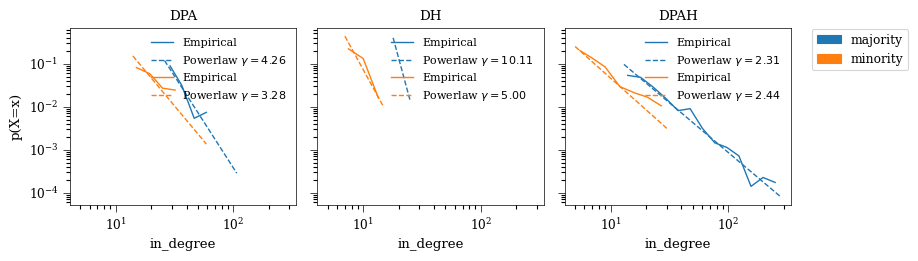

In [10]:
viz.plot_powerlaw_fit(distributions, col_name='in_degree', hue='real_label',
                      kind='pdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

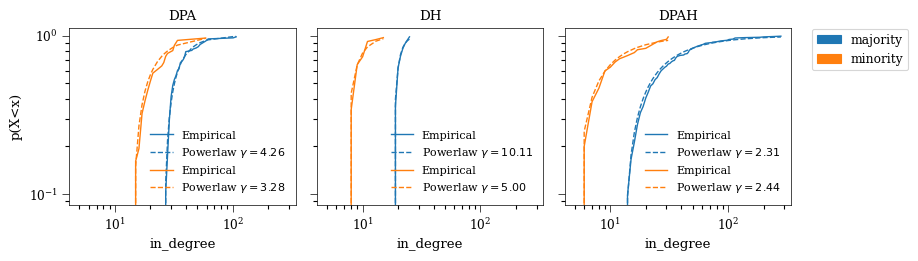

In [11]:
viz.plot_powerlaw_fit(distributions, col_name='in_degree', hue='real_label',
                      kind='cdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

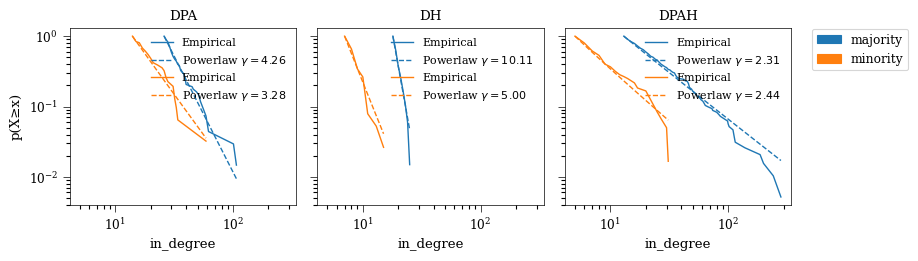

In [12]:
viz.plot_powerlaw_fit(distributions, col_name='in_degree', hue='real_label',
                      kind='ccdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

#### Out-degree

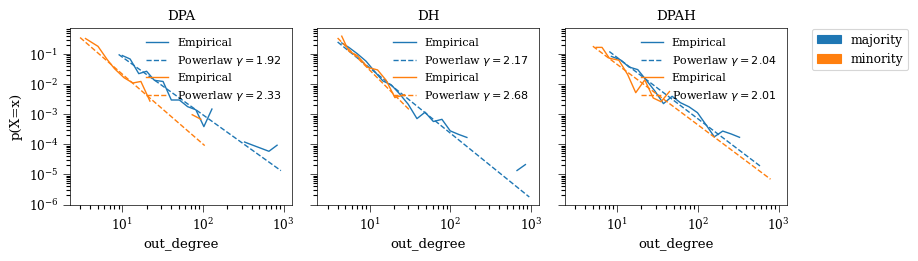

In [13]:
viz.plot_powerlaw_fit(distributions, col_name='out_degree', hue='real_label',
                      kind='pdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

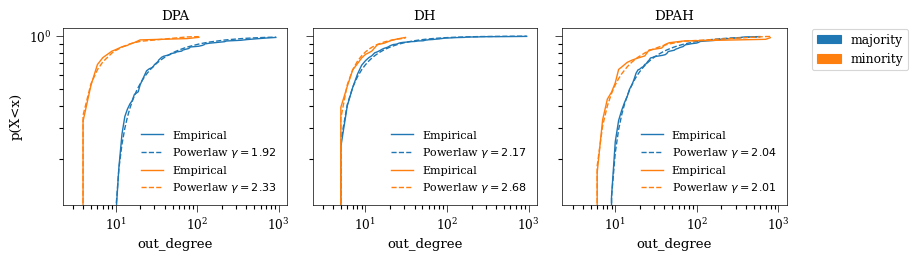

In [14]:
viz.plot_powerlaw_fit(distributions, col_name='out_degree', hue='real_label',
                      kind='cdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

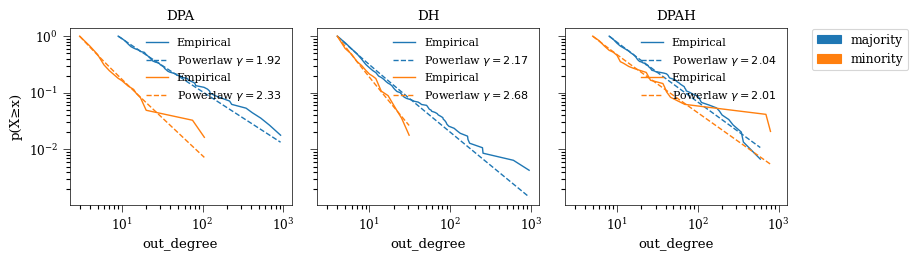

In [15]:
viz.plot_powerlaw_fit(distributions, col_name='out_degree', hue='real_label',
                      kind='ccdf', fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)

#### Clustering

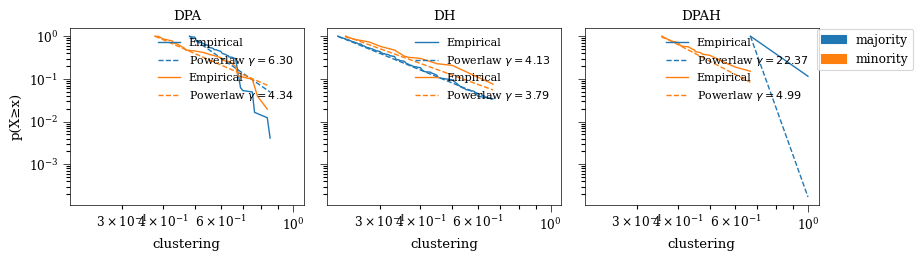

In [16]:
viz.plot_powerlaw_fit(distributions, col_name='clustering', hue='real_label',
                      kind='ccdf', verbose=False, bbox=(0.97, 0.9), fontsize=8, 
                      wspace=0.1, cell_size=(2.8,2.7), sharex=True, sharey=True)

#### PageRank

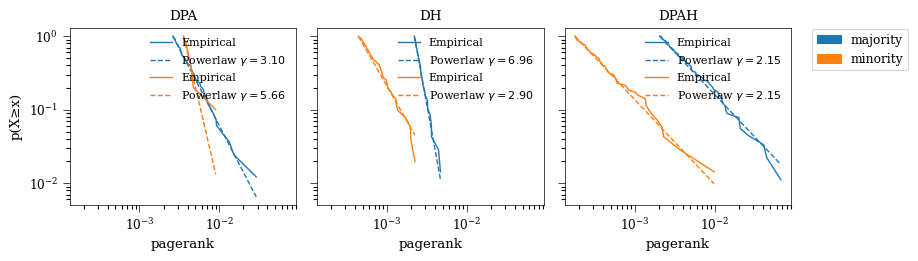

In [17]:
viz.plot_powerlaw_fit(distributions, col_name='pagerank', hue='real_label',
                      kind='ccdf', verbose=False, bbox=(1.0, 0.9), fontsize=8,
                      cell_size=2.7, sharex=True, sharey=True)